In [3]:
from PreProcessing import load_point_clouds, compute_convex_hull_volume_tensor, visualize_point_cloud
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

POINT_CLOUDS_DIR = "./data/unaligned_brains/"

pc_list, labels = load_point_clouds(POINT_CLOUDS_DIR)
volumes_np = compute_convex_hull_volume_tensor(pc_list)

C:\Users\Matte\AppData\Local\Temp\ipykernel_14780\4065767480.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=volumes_np, palette="viridis")


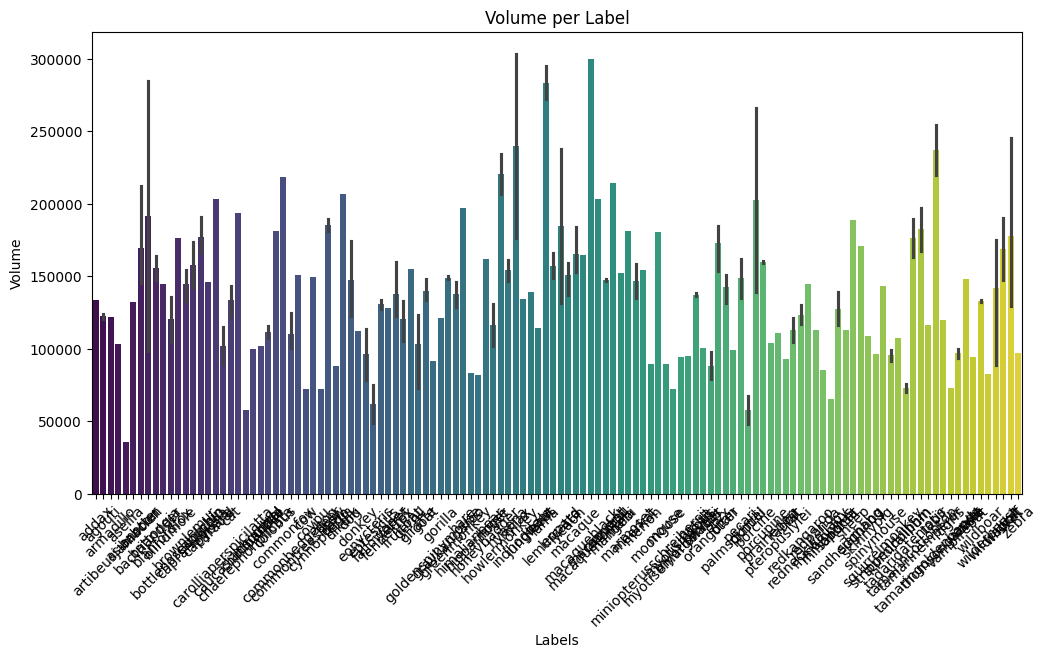

In [4]:
plt.figure(figsize=(12, 6))
sns.barplot(x=labels, y=volumes_np, palette="viridis")
plt.xlabel("Labels")
plt.ylabel("Volume")
plt.title("Volume per Label")
plt.xticks(rotation=45)
plt.show()

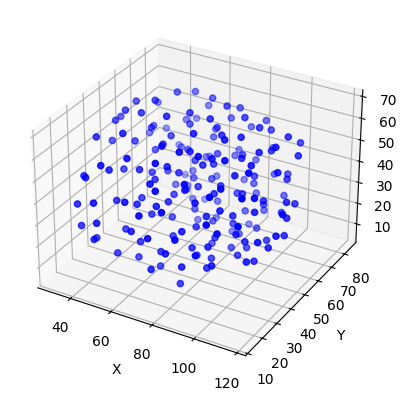

In [6]:
# visualizing the second biggest brain 
visualize_point_cloud(pc_list[64])

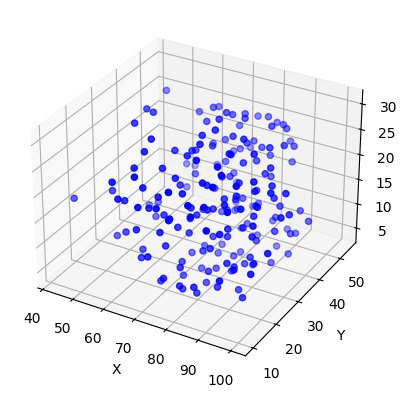

In [5]:
# visualizing the smallest brain
visualize_point_cloud(pc_list[5])

In [7]:
print("Basic Statistics:")
print(f"Mean: {np.mean(volumes_np):.4f}")
print(f"Median: {np.median(volumes_np):.4f}")
print(f"Standard Deviation: {np.std(volumes_np):.4f}")
print(f"Min: {np.min(volumes_np):.4f}")
print(f"Max: {np.max(volumes_np):.4f}")

Basic Statistics:
Mean: 140039.2115
Median: 136038.5704
Standard Deviation: 46005.6730
Min: 35921.2936
Max: 303249.6724


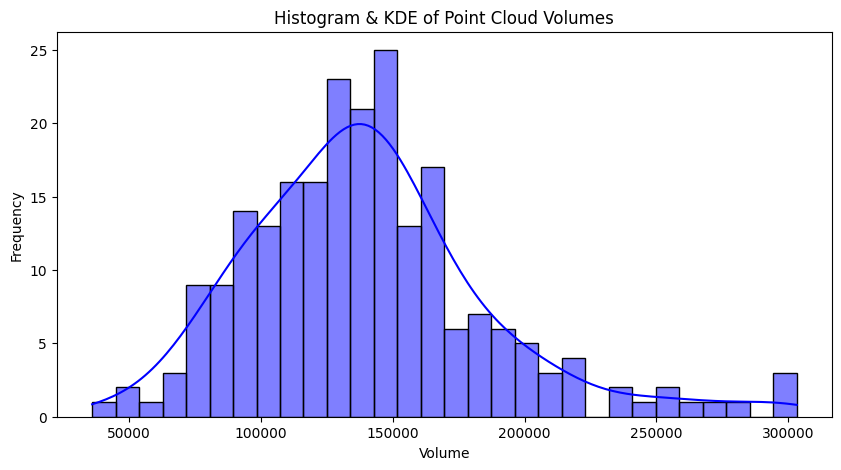

In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(volumes_np, kde=True, bins=30, color='blue')
plt.xlabel("Volume")
plt.ylabel("Frequency")
plt.title("Histogram & KDE of Point Cloud Volumes")
plt.show()

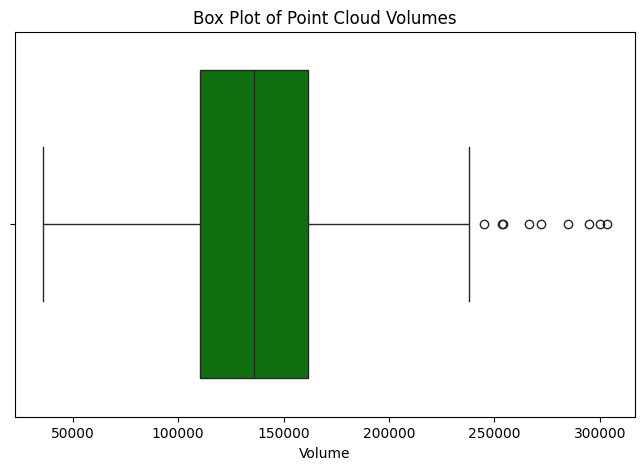

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=volumes_np, color='green')
plt.xlabel("Volume")
plt.title("Box Plot of Point Cloud Volumes")
plt.show()

Now we repeat the same analysis but we consider the **raiuds**, which we define as $r = V^{1/3}/2$

In [11]:
radius_np = volumes_np**(1/3)/2
print(radius_np)

[25.5630243  24.95921932 24.69381304 24.81975555 23.48796779 16.49759585
 25.45833466 26.68196682 26.87276864 26.41258563 25.92023226 31.64182464
 32.90207533 23.09197342 27.38653292 26.42748617 26.25041707 25.70410128
 23.58229176 28.04508565 25.52478519 26.31523725 26.84204978 28.17747818
 25.66248412 26.50507561 27.61007546 27.90884473 28.80441497 27.47389134
 26.31891646 29.39796965 22.37252352 24.30187925 26.40884649 25.58447991
 23.37003236 25.42931305 26.27165185 26.13582298 28.93961081 19.3075022
 23.22178857 23.38669932 24.38270228 23.7860286  28.28345859 30.10189995
 24.99675822 23.98610664 22.92463361 26.61265386 20.81450908 26.54330024
 20.82197002 28.70925391 28.30663585 22.24073649 29.55901721 24.9303588
 29.35467364 25.28637934 25.71524644 24.67145236 29.73780636 23.86048555
 24.14186528 24.22785828 21.42015675 21.07051469 18.31944961 25.18778906
 25.55935491 25.38640196 25.20968924 25.88111963 25.0554281  24.66514792
 27.51637047 25.2060367  25.97137101 22.88676178 25.2

C:\Users\Matte\AppData\Local\Temp\ipykernel_14780\3934276387.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=radius_np, palette="viridis")


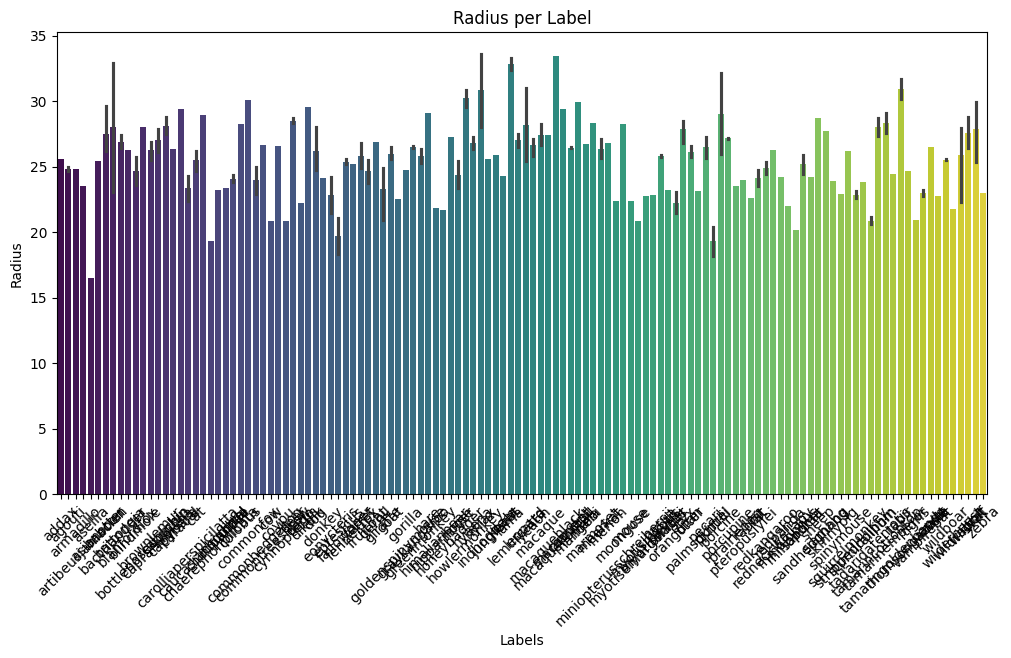

In [12]:
plt.figure(figsize=(12, 6))
sns.barplot(x=labels, y=radius_np, palette="viridis")
plt.xlabel("Labels")
plt.ylabel("Radius")
plt.title("Radius per Label")
plt.xticks(rotation=45)
plt.show()

In [13]:
print("Basic Statistics:")
print(f"Mean: {np.mean(radius_np):.4f}")
print(f"Median: {np.median(radius_np):.4f}")
print(f"Standard Deviation: {np.std(radius_np):.4f}")
print(f"Min: {np.min(radius_np):.4f}")
print(f"Max: {np.max(radius_np):.4f}")
    

Basic Statistics:
Mean: 25.6615
Median: 25.7152
Standard Deviation: 2.8031
Min: 16.4976
Max: 33.5921


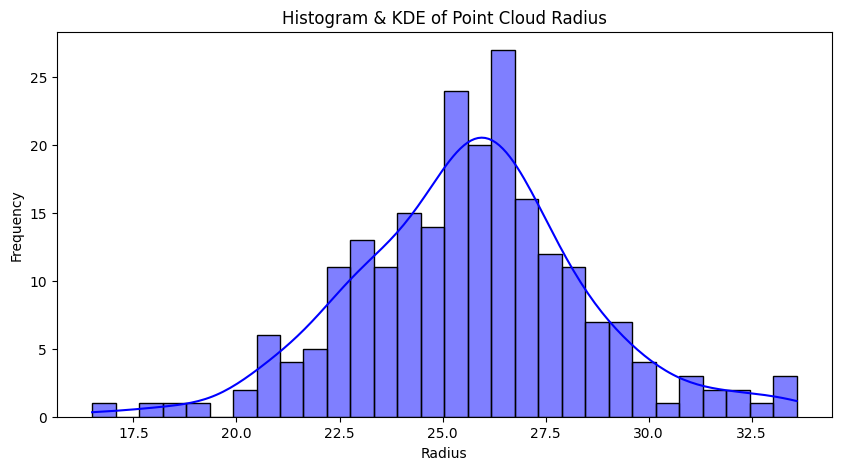

In [15]:
plt.figure(figsize=(10, 5))
sns.histplot(radius_np, kde=True, bins=30, color='blue')
plt.xlabel("Radius")
plt.ylabel("Frequency")
plt.title("Histogram & KDE of Point Cloud Radius")
plt.show()

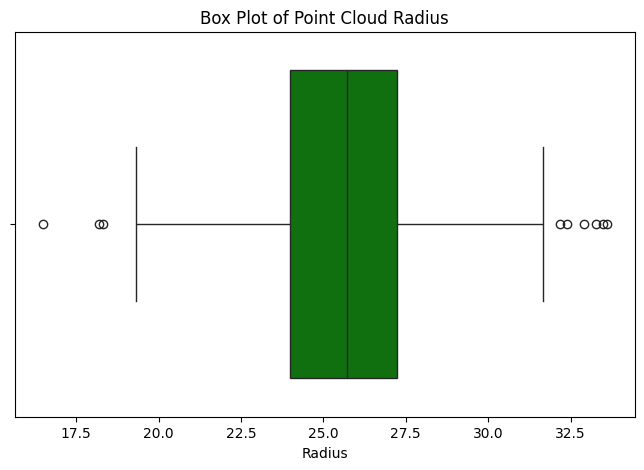

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=radius_np, color='green')
plt.xlabel("Radius")
plt.title("Box Plot of Point Cloud Radius")
plt.show()

In [2]:
import pandas as pd
import torch

# Carica il CSV
df = pd.read_csv('./siamese_network_pointnet2/siamese_network_pointnet2_cls_msg.csv')

# Convertili in tensori
pred = torch.tensor(df['Predicted'].values, dtype=torch.float32)
target = torch.tensor(df['Target'].values, dtype=torch.float32)

# Calcola la correlazione
def pearson_corr(x, y):
    x_centered = x - x.mean()
    y_centered = y - y.mean()
    return (x_centered * y_centered).mean() / (x.std() * y.std())

def compute_r2(y_true, y_pred):
    ss_res = torch.sum((y_true - y_pred) ** 2)  # Residual sum of squares
    ss_tot = torch.sum((y_true - torch.mean(y_true)) ** 2)  # Total sum of squares
    r2 = 1 - (ss_res / ss_tot)
    return r2.item()

corr = pearson_corr(pred, target)
print(f"Correlazione (torch): {corr.item():.4f}")

r2 = compute_r2(target, pred)
print(f"R^2: {r2:.4f}")

ModuleNotFoundError: No module named 'torch'

In [ ]:
import pandas as pd
import torch

# Carica il CSV
df = pd.read_csv('./naive_mlp/predictions.csv')

# Convertili in tensori
pred = torch.tensor(df['Predicted'].values, dtype=torch.float32)
target = torch.tensor(df['Target'].values, dtype=torch.float32)

# Calcola la correlazione
def pearson_corr(x, y):
    x_centered = x - x.mean()
    y_centered = y - y.mean()
    return (x_centered * y_centered).mean() / (x.std() * y.std())

corr = pearson_corr(pred, target)
print(f"Correlazione (torch): {corr.item():.4f}")

r2 = compute_r2(target, pred)
print(f"R^2: {r2:.4f}")